In [ ]:
# Problem set of confidence intervals

# Problem 1
# I am analyzing the average waiting time of an emergency room
# the data is extracted from a random sample of 64 people from a hospital
# The 95% confidence interval was obtained from the interval of time people
# checked into the ER until they were first seen by a doctor. This confidence 
# interval is [128 - 147]minutes. It is based on the normal model of the mean
# (It encompasses the 95% of cases in a normal distribution)
    # 1. False, since we only need the sample size to be larger than 30
        # so that by using the central limit theorem, the population
        # distribution is irrelevant if we are analyzing the means.
    # 2. False, the confidence interval gives us information about
        # the whole population, not about the sample we get it from.
    # 3. True. It means that if we repeated this sampling procedure 
        # many times, we would expect 95% of the confidence intervals to 
        # contain the true population mean. It does not mean that 95% of 
        # the population values are in this interval, or that there is a 95% 
        # chance that the population mean is in this interval.    
    # 4. False. 95% of random samples from the population would have
        # a confidence interval that contains the population mean between
        # 128 and 147 minutes.
    # 5. False. A higher confidence interval means a larger margin of 
        # error, which increases width (plot in cell 3). And viceversa.
    # 6. True. The margin of error is half the length of the CI and the
        # sample mean is the CI extreme points mean.
    # 7. False. We would have to quadruple the sample size, since the
        # margin of error is proportional to the inverse square root of 
        # the sample size

In [116]:
# Problem 2
# Calculating 80, 90 and 95% confidence intervals
# for the population mean.

# Importing useful libraries
import numpy as np
import scipy.stats as ss
import random 

# Import libraries specially necessary for confidence intervals
import statsmodels.stats.weightstats as smw
import statsmodels.stats.proportion as smp

# Creating a list of the sample data gathered form the problem set
sample = [18.41, 18.32, 22.86, 14.47, 16.91, 18.6, 20.86, 19.06, 16.83, 
20.71, 20.74, 18.42, 17.72, 20.66, 22.05, 20.85, 15.54, 21.04, 21.42, 
21.43, 15.56, 21.74, 22.34, 21.97, 18.01, 19.11, 19.79, 22.13, 21.96, 
22.16, 22.83, 24.34, 17.97, 21.8]

# Defining a random seed 
# random.seed(3)
# creating a subsample of half the size of the sample. make this subsample
# a numpy array
subSample = np.array(
    random.choices(sample, k = int(len(sample) / 2)) # k is the sample size
)

# Calculating the 95% confidence interval 
confInterval95 = smw.DescrStatsW(subSample).zconfint_mean(alpha=0.05, alternative='two-sided')

# Calculating the 90% confidence interval
confInterval90 = smw.DescrStatsW(subSample).zconfint_mean(alpha=0.1, alternative='two-sided')

# Calculating the 80% confidence interval 
confInterval80 = smw.DescrStatsW(subSample).zconfint_mean(alpha=0.2, alternative='two-sided')

print(f"""
95% {confInterval95}
90% {confInterval90}
80% {confInterval80}""")


95% (19.583599630240208, 22.024635663877433)
90% (19.779826638367233, 21.82840865575041)
80% (20.00606381159697, 21.60217148252067)


In [104]:
ss.describe(subSample)
np.std(subSample)

2.4192243316364874

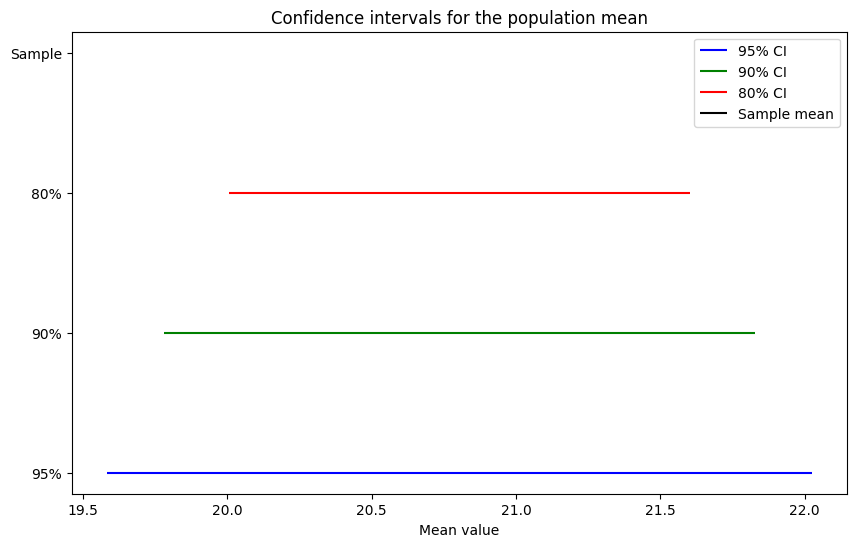

In [117]:
# Creating a plot for visualizing the data obtained
# Importing matplotlib.pyplot
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(10,6))

# Plotting the sample mean and the confidence intervals as horizontal lines
plt.hlines(y=1, xmin=confInterval95[0], xmax=confInterval95[1], color="blue", label="95% CI") 
plt.hlines(y=2, xmin=confInterval90[0], xmax=confInterval90[1], color="green", label="90% CI") 
plt.hlines(y=3, xmin=confInterval80[0], xmax=confInterval80[1], color="red", label="80% CI") 
plt.hlines(y=4, xmin=subSample.mean(), xmax=subSample.mean(), color="black", label="Sample mean")

# Adding some labels and a legend
plt.xlabel("Mean value") 
plt.yticks([1,2,3,4], ["95%", "90%", "80%", "Sample"]) 
plt.legend(loc="upper right") 
plt.title("Confidence intervals for the population mean")

# Showing the plot
plt.show()

In [100]:
# Problem 3
# import numpy and scipy libraries
import numpy as np
from scipy.stats import norm

# define sample proportion, critical value and sample size
p_hat = 0.625
z = 2.576
n = 200

# calculate standard error of sample proportion
se = np.sqrt(p_hat * (1 - p_hat) / n)

# calculate lower and upper bounds of confidence interval
lower = p_hat - z * se
upper = p_hat + z * se

# print confidence interval
print(f"""The 99% confidence interval for the population
 proportion is ({lower:.3f}, {upper:.3f}), the standard error is {se}""")

The 99% confidence interval for the population
 proportion is (0.537, 0.713), the standard error is 0.03423265984407288


In [124]:
# Problem 6
# import pandas and scipy libraries
import pandas as pd
from scipy.stats import norm

# define a function to calculate a confidence interval for a proportion
def ci_proportion(x, n, alpha):
  # calculate the sample proportion
  p = x / n
  # find the z-value for the given confidence level
  z = norm.ppf(1 - alpha / 2)
  # calculate the margin of error
  me = z * (p * (1 - p) / n) ** 0.5
  # construct the confidence interval
  lower = p - me
  upper = p + me
  # return the confidence interval as a tuple
  return (lower, upper)

# read the excel file into a dataframe using pandas
df = pd.read_excel("titanic_train.xlsx")

# filter the data by gender and survival status using pandas methods
males = df[df["Sex"] == "male"]
females = df[df["Sex"] == "female"]
males_survived = males[males["Survived"] == 1]
females_survived = females[females["Survived"] == 1]

# count the number of males and females who survived and the total number of males and females using pandas methods
x_males = len(males_survived)
n_males = len(males)
x_females = len(females_survived)
n_females = len(females)

# set the confidence level to 0.95 (alpha = 0.05)
alpha = 0.05

# call the function to calculate the confidence intervals for males and females using the counts from above
ci_males = ci_proportion(x_males, n_males, alpha)
ci_females = ci_proportion(x_females, n_females, alpha)

# print the results in a formatted way using f-strings
print(f"For males, x = {x_males}, n = {n_males}, CI = {ci_males}")
print(f"For females, x = {x_females}, n= {n_females}, CI= {ci_females}")

For males, x = 109, n = 577, CI = (0.15696920203146356, 0.22084708912971493)
For females, x = 233, n= 314, CI= (0.693646158912385, 0.790430274208634)


In [127]:
# import pandas and scipy libraries
import pandas as pd
from scipy.stats import norm

# define a function to calculate a confidence interval for a proportion
def ci_proportion(x, n, alpha):
  # calculate the sample proportion
  p = x / n
  # find the z-value for the given confidence level
  z = norm.ppf(1 - alpha / 2)
  # calculate the margin of error
  me = z * (p * (1 - p) / n) ** 0.5
  # construct the confidence interval
  lower = p - me
  upper = p + me
  # return the confidence interval as a tuple
  return (lower, upper)

# read the excel file into a dataframe using pandas
df = pd.read_excel("titanic_train.xlsx")

# filter the data by class and survival status using pandas methods
first_class = df[df["Pclass"] == 1]
second_class = df[df["Pclass"] == 2]
third_class = df[df["Pclass"] == 3]
first_class_survived = first_class[first_class["Survived"] == 1]
second_class_survived = second_class[second_class["Survived"] == 1]
third_class_survived = third_class[third_class["Survived"] == 1]

# count the number of passengers in each class who survived and the total number of passengers in each class using pandas methods
x_first = len(first_class_survived)
n_first = len(first_class)
x_second= len(second_class_survived)
n_second= len(second_class)
x_third= len(third_class_survived)
n_third= len(third_class)

# set the confidence level to 0.95 (alpha = 0.05)
alpha = 0.05

# call the function to calculate the confidence intervals for each class using the counts from above
ci_first= ci_proportion(x_first, n_first, alpha)
ci_second= ci_proportion(x_second, n_second, alpha)
ci_third= ci_proportion(x_third, n_third, alpha)

# print the results in a formatted way using f-strings
print(f"For first class passengers, x = {x_first}, n ={n_first}, CI ={ci_first}")
print(f"For second class passengers, x ={x_second}, n ={n_second}, CI ={ci_second}")
print(f"For third class passengers, x ={x_third}, n ={n_third}, CI ={ci_third}")

For first class passengers, x = 136, n =216, CI =(0.5652302161570761, 0.6940290431021832)
For second class passengers, x =87, n =184, CI =(0.40068762976132744, 0.544964544151716)
For third class passengers, x =119, n =491, CI =(0.20445976825677095, 0.280265282659726)


Checking normality assumption:
count    50.000000
mean      0.049020
std       0.005313
min       0.041000
25%       0.044000
50%       0.051000
75%       0.053000
max       0.058000
Name: leak_rates, dtype: float64
0.010494378700832153
-1.667156168578907
AxesSubplot(0.125,0.11;0.775x0.77)
The sample variance is 2.822408163265307e-05
The confidence interval for variance is (1.9694281779301425e-05, 4.382771862623103e-05)


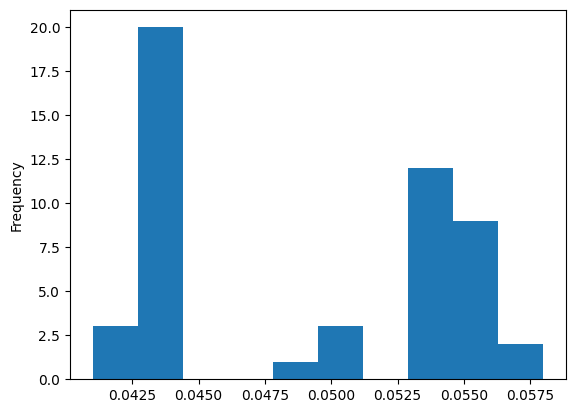

In [129]:
# import pandas and scipy libraries
import pandas as pd
from scipy.stats import chi2

# define a function to calculate a confidence interval for a variance
def ci_variance(s2, n, alpha):
  # find the chi-square values for the given confidence level
  lower_chi2 = chi2.ppf(alpha / 2, n - 1)
  upper_chi2 = chi2.ppf(1 - alpha / 2, n - 1)
  # calculate the lower and upper bounds of the confidence interval
  lower = (n - 1) * s2 / upper_chi2
  upper = (n - 1) * s2 / lower_chi2
  # return the confidence interval as a tuple
  return (lower, upper)

# read the excel file into a dataframe using pandas
df = pd.read_excel("tocs.xlsx", sheet_name="TOC")

# extract the leak rates from the dataframe using pandas methods
leak_rates = df["leak_rates"]

# check the assumption of normality using pandas methods and scipy functions
print("Checking normality assumption:")
print(leak_rates.describe())
print(leak_rates.skew())
print(leak_rates.kurtosis())
print(leak_rates.plot.hist())

# calculate the sample variance and size using pandas methods
s2 = leak_rates.var()
n = len(leak_rates)

# set the confidence level to 0.95 (alpha = 0.05)
alpha = 0.05

# call the function to calculate the confidence interval for variance using the sample variance and size from above
ci_var = ci_variance(s2, n, alpha)

# print the result in a formatted way using f-strings
print(f"The sample variance is {s2}")
print(f"The confidence interval for variance is {ci_var}")